In [1]:
import geopandas

In [2]:
from math import *

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geocoder
from time import sleep

In [11]:
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style="ticks", palette="Set2")

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
cd

/Users/mmngreco


In [4]:
pwd

'/Users/mmngreco'

In [5]:
%%HTML
<iframe src="https://mapsengine.google.com/map/embed?mid=zTtXepJtMlLc.k6VXMPFTI7DI" width="640" height="480"></iframe>

En los mapas físicos, las coordenadas están expresadas en grados, así que la posición de Puerto Rico sería:
18°14’70” N  66°29’68” W

La forma de convertir estos datos a decimales sería:

$(18°14’70” N) = (18 + (14 / 60) + (70 / 3600)) = 18.252$

$(66°29’68” W) = -(66 + (29 / 60) + (68 / 3600)) = -66.8627$

La longitud se multiplica por negativo, porque está a la izquierda (oeste) del punto 0,0. Para esta guía solo vamos a estar trabajando con decimales.

In [6]:
url = 'https://en.wikipedia.org/wiki/ISO_3166-2:ES'

In [7]:
# obtener códigos ISO:
ca_iso, prov_iso = pd.read_html(url, header=0, encoding='Latin')[:2]


In [8]:
prov_iso.columns = 'codigo nombre ca'.split()
ca_iso.drop(ca_iso.columns[-1], axis=1, inplace=True)
ca_iso.columns = 'codigo ca'.split()

# EN R 

In [16]:
%load_ext rpy2.ipython

In [47]:
%R -o data data <- readRDS("Downloads/ESP_adm1-2.rds")

<RS4 - Python:0x110380088 / R:0x7fa29d1ef348>

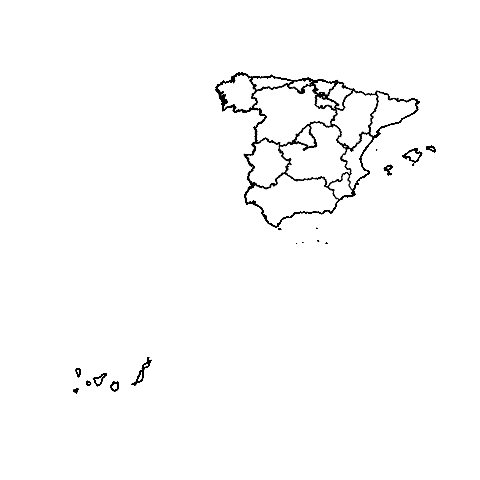

In [294]:
%%R
plot(data[1])

# ELECCIÓN (OFERTA)

In [295]:
g = geocoder.google(coords['zaragoza'], method='reverse')
g.json['city']

'Zaragoza'

In [ ]:
# PRUEBA 
# COORDENADAS DE LAS LOCALIDADES

localidades = ['zaragoza', 'oviedo', 'huesca', 'madrid', 'bilbao']
distancias = dict()
coords = dict()
for loc in localidades:
    g = geocoder.google(loc)
    x1 = g.json['lat']
    x2 = g.json['lng']
    print(loc, x1, x2, sqrt(x1 ** 2 + x2 ** 2))
    distancias[loc] = sqrt(x1 ** 2 + x2 ** 2)
    coords[loc] = [x1, x2]

# DEMANDA

SERIE TEMPORAL TIPO:

$y_t = \delta_0 + \delta_1 * t + u_t$

In [12]:
# estimación de la demanda: clientes
year = 360

In [13]:
t = np.arange(1, year * 3)

[ 446.24729373] [ 9.04080307] 0.000503661149549 5328.28145762
[ 950.53930673] [ 10.64117602] 0.000503661149549 6696.77486024
[ 478.10369132] [ 8.55750263] 0.000503661149549 5099.15561471
[ 596.32377745] [ 10.21953453] 0.000503661149549 6114.87292903
[ 216.40639594] [ 8.96321407] 0.000503661149549 5056.542497


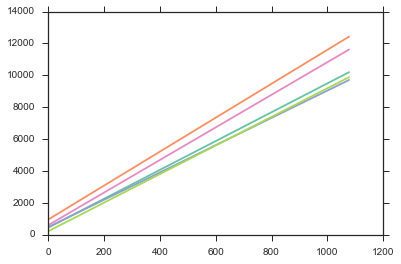

In [14]:
names = 'c1, c2, c3, c4, c5'.split(', ')

for c in names:
    ut = np.sin(np.arange(len(t)) * 48) * 4
    delta0 = np.random.uniform(100, 10**3, 1)
    delta1 = np.random.normal(10, 1, 1)
    
    globals()[c] = delta1 * t + ut + delta0
    globals()[c].flatten()
    
    print(delta0, delta1, np.mean(ut.flatten()), np.mean(globals()[c]))

clientes = [c1,c2,c3,c4,c5]

for c in clientes:
    g = plt.plot(c)

$\text{Min:} \sum{c_i · w_i · d_i}$

In [15]:
wi = np.array(list(map(np.mean, clientes)))
ci = np.random.uniform(0.2, 1, size=len(clientes))
#di = np.array(list(distancias.values()))

# QUE ES LO QUE SE MINIMIZA???
# PROBLEMA DE TRANSPORTE
# ELEGIMOS COORDENADAS


# MAS: MONTECARLO

In [16]:
# montecarlo
xmax = (0)
xmin = (-8.2395)

ymax = (44.72)
ymin = (42.56)

xs = np.random.uniform(xmin, xmax, 500)
ys = np.random.uniform(ymin, ymax, 500)

In [17]:
# googlemaps

montecarlo = {}

for x in zip(ys,xs):
    g = geocoder.google(x, method='reverse', )
    try:
        loc = '%s: %s' % (g.json['country'], g.json['state'])
        print(g.json['country'], g.json['state'])
    except:
        continue
    lat = g.json['lat']
    lng = g.json['lng']
    coordenadas = [[lat,lng]]
    montecarlo[loc] = montecarlo.get(loc, coordenadas) + coordenadas

ES CL
ES CL
ES AL
ES AL
ES Comunidad Valenciana
PT Castelo Branco
ES EX
ES EX
ES AL
DZ Aïn-Defla
ES Comunidad Valenciana
MA Taza-Al Hoceima-Taounate
PT Viseu
ES CM
ES CM
ES Aragón
ES Región de Murcia
ES AL
DZ Oran
PT Beja
ES CM
ES EX
ES CM
DZ Oran
PT Évora
MA Tanger-Tétouan
ES Región de Murcia
ES Aragón
ES Aragón
DZ Wilaya de Relizane
ES Comunidad de Madrid
ES AL
ES Comunidad Valenciana
DZ Sidi-Bel-Abbès
ES CM
ES AL
DZ Mascara
ES EX
ES AL
ES CL
ES CL
ES CM
ES Región de Murcia
ES CM
DZ Mostaganem
ES Región de Murcia
ES CM
DZ Mascara
DZ Mostaganem
ES AL
DZ Wilaya de Tissemsilt
ES AL
ES CL
ES CL
PT Évora
ES CL
ES EX
ES AL
ES Aragón
ES CM
ES CL
ES AL
ES AL
ES CL
ES Región de Murcia
ES CM
DZ Oran
PT Portalegre
DZ Chlef
PT Viana do Castelo
ES PM
ES CL
ES Comunidad Valenciana
ES Aragón
ES EX
ES CM
DZ Tlemcen
ES CL
ES EX
ES AL
ES Comunidad Valenciana
ES Aragón
ES CL
PT Viseu
ES CM
ES EX
ES CL
ES EX
ES CL
ES Comunidad Valenciana
ES AL
PT Portalegre
ES AL
PT Bragança
ES EX
DZ Wilaya de Tissemsil

In [97]:
mapquest_api = open('Documents/mq_api.txt').read()
gmaps_api = open('Documents/googlemaps_api.txt').read()
geocoder_api = open('Documents/geocoder_api.txt').read()
mbox_api = open('Documents/mbox_api.txt').read()

In [20]:
prov_iso.head(), ca_iso.head()

(  codigo                     nombre  ca
 0   ES-C  A Coruña (gl) [La Coruña]  GA
 1  ES-VI    Alava !Álava Araba (eu)  PV
 2  ES-AB                   Albacete  CM
 3   ES-A      Alicante Alacant (ca)  VC
 4  ES-AL                    Almería  AN,   codigo                       ca
 0  ES-AN                Andalucía
 1  ES-AR                   Aragón
 2  ES-AS  Asturias, Principado de
 3  ES-CN                 Canarias
 4  ES-CB                Cantabria)

In [22]:
# TRADUCIR LOS NOMBRES QUE NO SALEN
for k in montecarlo.keys():
    if k.startswith('ES'):
        if len(k[4:]) > 2:
            print(k[4:])
        else:
            name = prov_iso[prov_iso.codigo == k.replace(': ', '-')]['nombre'].values
            
            if len(name) == 0:
                name = ca_iso[ca_iso.codigo == k.replace(': ', '-')]['ca'].values
            print(name)

Aragón
['Balears (ca) [Baleares]']
['Ceuta']
La Rioja
Comunidad Valenciana
Región de Murcia
['País Vasco Euskal Herria (eu)']
['Galicia (gl) [Galicia]']
['Castilla La Mancha !\xa0Castilla-La Mancha']
Navarra
['Catalunya (ca) [Cataluña]']
Comunidad de Madrid
['Extremadura']
['Castilla y León']
['Almería']


# MAPA

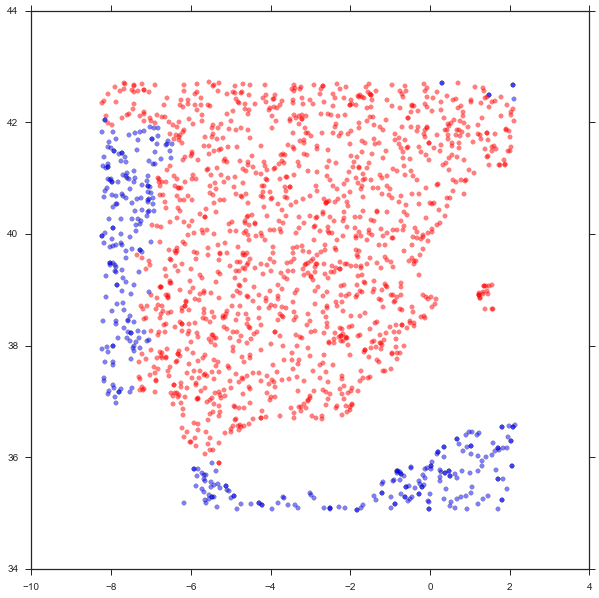

In [23]:
plt.figure(figsize=(10,10))
for k, cs in montecarlo.items():
    x = [c[0] for c in cs]
    y = [c[1] for c in cs]

    if k.startswith('ES'):
        plt.scatter(y, x, color='red', marker='o', alpha=0.5)
    else:
        plt.scatter(y, x, alpha=0.5)

#plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# EXPORTAR DATOS

In [24]:
file_name = 'Documents/repos/unizar/SIAD/Trabajo Grupo/coordenadas.csv'

In [25]:
f = open(file_name, 'a')
for loc, coords in montecarlo.items():
    for xy in coords:
        print('%s,%s,%s' % (loc,*xy), file=f)
f.close()

In [26]:
xys = pd.read_csv(file_name, header=None)

In [27]:
xys.columns = ['label', 'x', 'y']

In [28]:
xys['pais'] = xys['label'].apply(lambda x: x[:2])

In [29]:
xys['prov'] = xys['label'].apply(lambda x: x.split(': ')[1])

In [30]:
xys[xys.pais == 'ES'].prov.unique()

array(['Región de Murcia', 'Comunidad Valenciana', 'AL', 'CL', 'Navarra',
       'Principado de Asturias', 'Cantabria', 'GA', 'Comunidad de Madrid',
       'PV', 'PM', 'CM', 'CT', 'EX', 'La Rioja', 'Aragón', 'CE'], dtype=object)

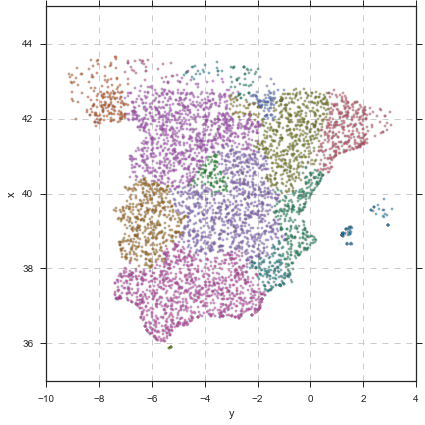

In [31]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

#xys[xys.pais == 'ES'].plot(kind='scatter', x='y', y='x', alpha=0.6, ax=ax)

color = sns.color_palette("Set1", 17)
color = sns.color_palette("husl", 17)
#color = sns.color_palette("cubehelix", 17)


n_color = list(map(int,'9  7 15 14 12 16 10  1  6  8 11 13  0  2  3  4  5'.split()))

for i, region in enumerate(xys[xys.pais == 'ES'].prov.unique()):
    i = n_color[i]
    xys[xys.prov == region].plot(kind='scatter', 
                                 x='y', 
                                 y='x', 
                                 alpha=0.6, 
                                 ax=ax, 
                                 color=color[i], 
                                 marker='.')


ax.grid(True, linestyle='--')
plt.tight_layout()

In [32]:
ca = xys[xys.pais == 'ES'].prov.unique()

In [33]:
ns = list(filter(lambda x: len(x) < 3, ca))
ns

['AL', 'CL', 'GA', 'PV', 'PM', 'CM', 'CT', 'EX', 'CE']

In [34]:
dic_ca  = dict(zip(list(map(lambda x: x[3:], ca_iso.codigo.values)), list(ca_iso.ca.values)))
dic_prov = dict(zip(list(prov_iso.codigo.apply(lambda x: x.replace('ES-', '')).values), list(prov_iso.nombre.values)))

In [35]:
dic_names = dict()
dic_names.update(dic_ca)
dic_names.update(dic_prov)

[dic_names[n] for n in ns]

['Almería',
 'Castilla y León',
 'Galicia (gl) [Galicia]',
 'País Vasco Euskal Herria (eu)',
 'Balears (ca) [Baleares]',
 'Castilla La Mancha !\xa0Castilla-La Mancha',
 'Catalunya (ca) [Cataluña]',
 'Extremadura',
 'Ceuta']